# Project_Team_ID:- PTID-CDS-MAY-23-1529

# Liver_Patient_Prediction_Code:- (1007)

### Context:-
### Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.



### Content:-
### This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The Results column is a class label used to divide groups into liver patients and non liver patients. Results: field used to split the data into two sets (1 : patient with liver disease and 2: patient with no liver disease)

### Objective :- Our main target is to identify/predict whether the partient has an anomaly or abnormal functioning of liver

### Data preparation:-Importing dataset,domain analysis,data cleaning,all statistical summary,Outlier detection,EDA-univariate, bivariate, multivariate analysis of features, with various graphical representation.

### Machine Learning:-Data scaling,train test split,Used classification models using Hyperparameter with balanced Dataset (SMOTE) Analysis,graphical representation,ROC &AUC.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
data.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [3]:
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',header= None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


###  The head() function returns the first five rows of the DataFrame.It helps in understanding the column names, data types, and the actual values present in the dataset.

## Assigning Features /Columns names

In [4]:
features=['age','gender','TB','DB','AAP','sgpt','sgot','TP','albumin','agr','Results']
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',names=features)
data.head()

,age,gender,TB,DB,AAP,sgpt,sgot,TP,albumin,agr,Results
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### As there were no headers/feature names of the columns,we have assigned the names here.

## Checking File Size

In [5]:
data.shape

(583, 11)

### The DataFrame has 583 Rows and 11 Columns

# Understanding of Features :-  

## Domain analysis

### This is a small dataset contains 583 records with 11 features, also unbalanced dataset.*

### *The features given are age, gender, Total bilirubin(TB), Direct bilirubin(DB), Alkaline phosphaotase(AAP), Alamine Aminotransferase(sgpt),Aspartate Aminotransferase(sgot),Total protiens(TP), Albumin, Albumib and globulin ration(agr), and Results.*

### *Bilirubin- A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease.*
### *For adults over 18, normal total bilirubin can be up to 1.2 milligrams per deciliter (mg/dl) of blood. For those under 18, the normal level will be will be 1 mg/dl. Normal results for conjugated (direct) bilirubin should be less than 0.3 mg/dl.*
### *Total Bilirubin(TB):-Bilirubin is an orange-yellow pigment that occurs normally when part of your red blood cells break down. A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease.*

### *Direct Bilirubin(DB) :-Bilirubin attached by the liver to glucuronic acid, a glucose-derived acid, is called direct or conjugated, bilirubin. Bilirubin not attached to glucuronic acid is called indirect.*

### *Alkaline_Phosphotase(AAP) :- Alkaline phosphatase (AAP) is an enzyme that is present in many parts of the body, but it is primarily found in the liver, bones, intestine, and kidneys. Alkaline phosphatase testing measures the amount of this enzyme in the blood.The normal level of AAP is 20 to 140IU/L.*
### Higher-than-normal levels of AAP in your blood may indicate a problem with your liver or gallbladder.*
### *Alanine aminotransferase(sgpt)-It is usually referred to as sgpt, is an enzyme that is concentrated primarily in the liver.The normal range is 4 to 36 U/L.*
### High levels of sgpt can be a result of damage or injury to cells. Because sgpt is most concentrated in the liver.*
### *Aspartate aminotransferase(sgot) is an enzyme. Enzymes are types of proteins that enable most bodily processes. sgot exists mostly in the liver, but it is found in numerous tissues in the body.The normal range is 8 to 33 U/L.*
### High levels of sgot in the blood may indicate liver diseases.*
### *Total Protien(TP) :-The total protein test measures the total amount albumin and globulin in your body.*
### *The normal range is 6.0 to 8.3 grams per deciliter (g/dL) or 60 to 83 g/L.A high total protein level could indicate dehydration.*
### *Albumin_and_Globulin_Ratio	(agr) -High A/G ratio :- This can be a sign of disease in your liver, kidney.*
### *Albumin/Globulin ratio between 1.1 and 2.5 is considered normal.*


## Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      583 non-null    int64  
 1   gender   583 non-null    object 
 2   TB       583 non-null    float64
 3   DB       583 non-null    float64
 4   AAP      583 non-null    int64  
 5   sgpt     583 non-null    int64  
 6   sgot     583 non-null    int64  
 7   TP       583 non-null    float64
 8   albumin  583 non-null    float64
 9   agr      579 non-null    float64
 10  Results  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Here we can see there are 4 missing/null values in agr column

## Statistical Summary

In [7]:
data.describe()

,age,TB,DB,AAP,sgpt,sgot,TP,albumin,agr,Results
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### The data.describe() function is useful for gaining insights into the distribution and range of the numerical variables in a dataset. It helps in understanding the central tendencies, identifying potential outliers, and providing a quick overview of the data's statistical properties.

In [8]:
data['Results']=data['Results'].replace(2,0)
data.tail()

,age,gender,TB,DB,AAP,sgpt,sgot,TP,albumin,agr,Results
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,0


### replace() function is used to replace all occurrences of the value 2 with the value 0 where 1 denotes the patient with liver disease and 0 denotes the patient without liver disease. 

In [9]:
data.Results.value_counts()

1    416
0    167
Name: Results, dtype: int64

### This dataset contains higher number of Liver disease Patients as compared to Non Liver disease Patients

## Checking the datatypes of each column

In [10]:
data.dtypes

age          int64
gender      object
TB         float64
DB         float64
AAP          int64
sgpt         int64
sgot         int64
TP         float64
albumin    float64
agr        float64
Results      int64
dtype: object

In [11]:
data.columns

Index(['age', 'gender', 'TB', 'DB', 'AAP', 'sgpt', 'sgot', 'TP', 'albumin',
       'agr', 'Results'],
      dtype='object')

## Checking For NULL values

In [12]:
data.isnull().sum()

age        0
gender     0
TB         0
DB         0
AAP        0
sgpt       0
sgot       0
TP         0
albumin    0
agr        4
Results    0
dtype: int64

### There are 4 null/missing values in agr column

## Drop the missing values

In [13]:
data.dropna(inplace=True)

### The 'dropna()' function is applied to the DataFrame 'data', which identifies rows containing any missing values and removes them.The 'inplace=True' parameter ensures that the changes are applied directly to the original DataFrame data, modifying it in-place.


In [14]:
data=data[-data.duplicated(subset=None,keep='first')]

### data.duplicated(subset=None, keep='first') is called on the DataFrame 'data'. This function returns a Boolean Series that indicates whether each row is a duplicate or not. The 'subset=None' parameter specifies that duplicates should be checked across all columns, and keep='first' ensures that the first occurrence of each duplicated row is considered as non-duplicate.
### -data.duplicated(subset=None, keep='first') negates the Boolean Series, resulting in True for non-duplicate rows and False for duplicate rows. This is achieved by using the unary negation operator '-' before the Boolean Series.
### Finally, the negated Boolean Series is used to index the original DataFrame data using data[...], effectively selecting only the non-duplicate rows.

In [15]:
data.drop(data[data['TB']>50].index)
data.drop(data[data['DB']>15].index)
#data.drop(data[data['AAP']>2000].index)
data.drop(data[data['sgpt']>1500].index)
data.drop(data[data['sgot']>2000].index)
#data.drop(data[data['agr']>2.5].index)
print(data.shape)

(566, 11)


### Removal of outliers from the features.Here rows are dropped with specified index labels that have values greater than the specific value asked.

In [16]:
data.isnull().sum()

age        0
gender     0
TB         0
DB         0
AAP        0
sgpt       0
sgot       0
TP         0
albumin    0
agr        0
Results    0
dtype: int64

### There are no null/missing values in any columns.

## Assinging new index for gender column to numeric

In [17]:
data['Sex']=pd.get_dummies(data['gender'],prefix='Sex',drop_first=True)
data.drop('gender',axis=1,inplace=True)

### It is used to encode categorical variables in the DataFrame using one-hot encoding.Here 'gender' column is dropped and replaced by 'sex' column

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
data.head()

,age,TB,DB,AAP,sgpt,sgot,TP,albumin,agr,Results,Sex
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


### Dataset Contains Higher Numbers Of Liver Patients

##  Graphical Analysis

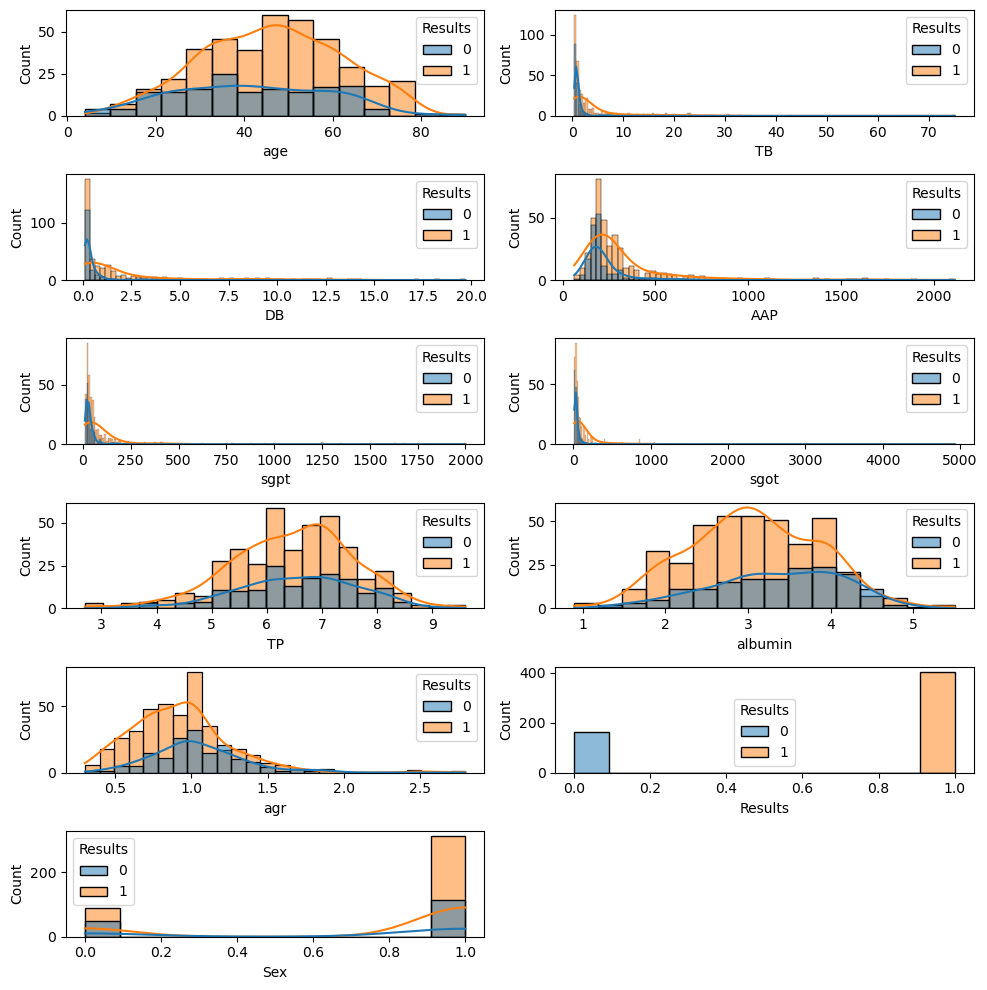

In [20]:
fig=plt.figure(figsize=(10,10))
plotnumber=1
for column in data.columns:
    plt.subplot(6,2,plotnumber)
    sns.histplot(x=column,data=data,hue='Results',kde=True)
    plotnumber+=1
plt.tight_layout()

### We can see from the first histogram that adults of age group 30 to 60 are more prone to liver diseases.

In [21]:
RS=data.Results.value_counts()
RS

1    404
0    162
Name: Results, dtype: int64

### There are 404 liver patients and 162 non liver patients

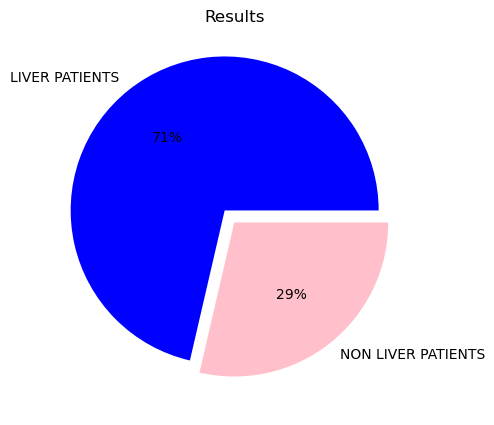

In [22]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,5
plt.pie(RS,[0.1,0],colors=['blue','pink'],labels=['LIVER PATIENTS','NON LIVER PATIENTS'],autopct='%1.0f%%')
plt.title("Results")
plt.show()

### 71% of dataset are Liver Patients and 29% are non liver patients.

In [23]:
GN=data.Sex.value_counts()
GN

1    428
0    138
Name: Sex, dtype: int64

### There are 428 male and 138 female patients.

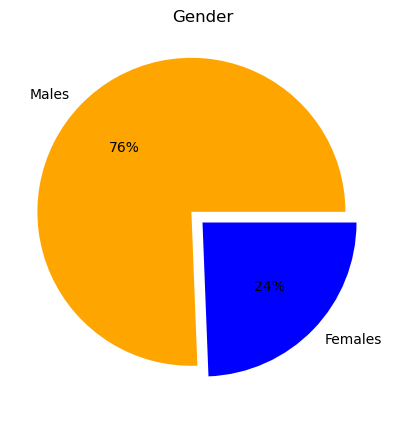

In [24]:
rcParams['figure.figsize'] = 5,5
plt.pie(GN,[0.1,0],colors=['Orange','Blue'],labels=['Males','Females'],autopct='%1.0f%%')
plt.title("Gender")
plt.show()

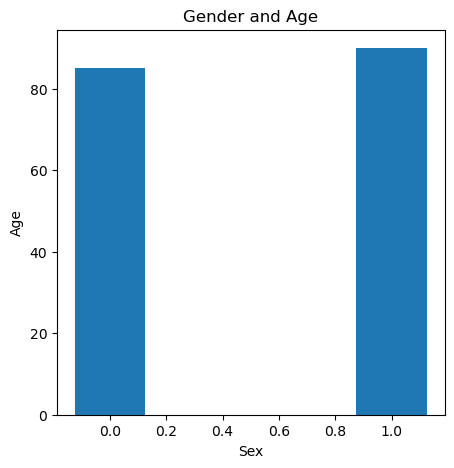

In [25]:
## Relation between Sex and Age:-
plt.bar(data.Sex,data.age,width=0.25)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Gender and Age')
plt.show()

### Almost all age groups contain both male and female patients.

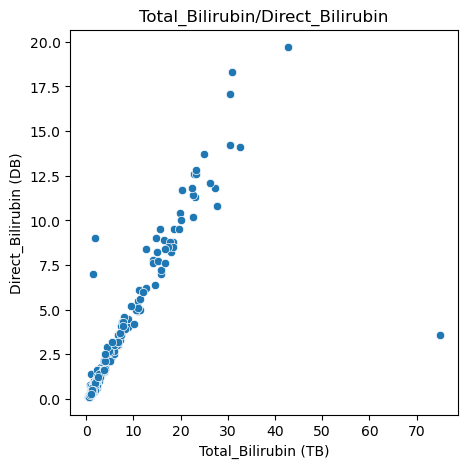

In [26]:
## Relation between TB and DB;-
sns.scatterplot(x=data.TB,y=data.DB)
plt.xlabel("Total_Bilirubin (TB)")
plt.ylabel("Direct_Bilirubin (DB)")
plt.title("Total_Bilirubin/Direct_Bilirubin")
plt.show()

### Both features have a direct relationship with each other.

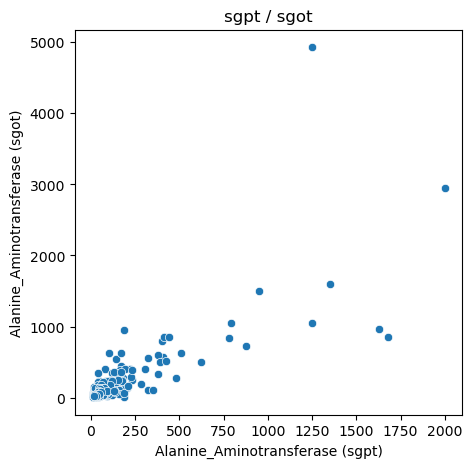

In [27]:
## Relation between sgpt and sgot:-
sns.scatterplot(x=data.sgpt,y=data.sgot)
plt.ylabel("Alanine_Aminotransferase (sgot)")
plt.xlabel("Alanine_Aminotransferase (sgpt)")
plt.title("sgpt / sgot")
plt.show()

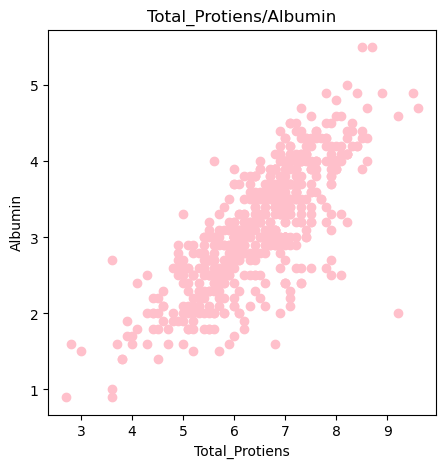

In [28]:
## Relation between TP and albumin:-
plt.scatter(x=data.TP, y=data.albumin, color ='pink')
plt.xlabel("Total_Protiens")
plt.ylabel("Albumin")
plt.title("Total_Protiens/Albumin")
plt.show()

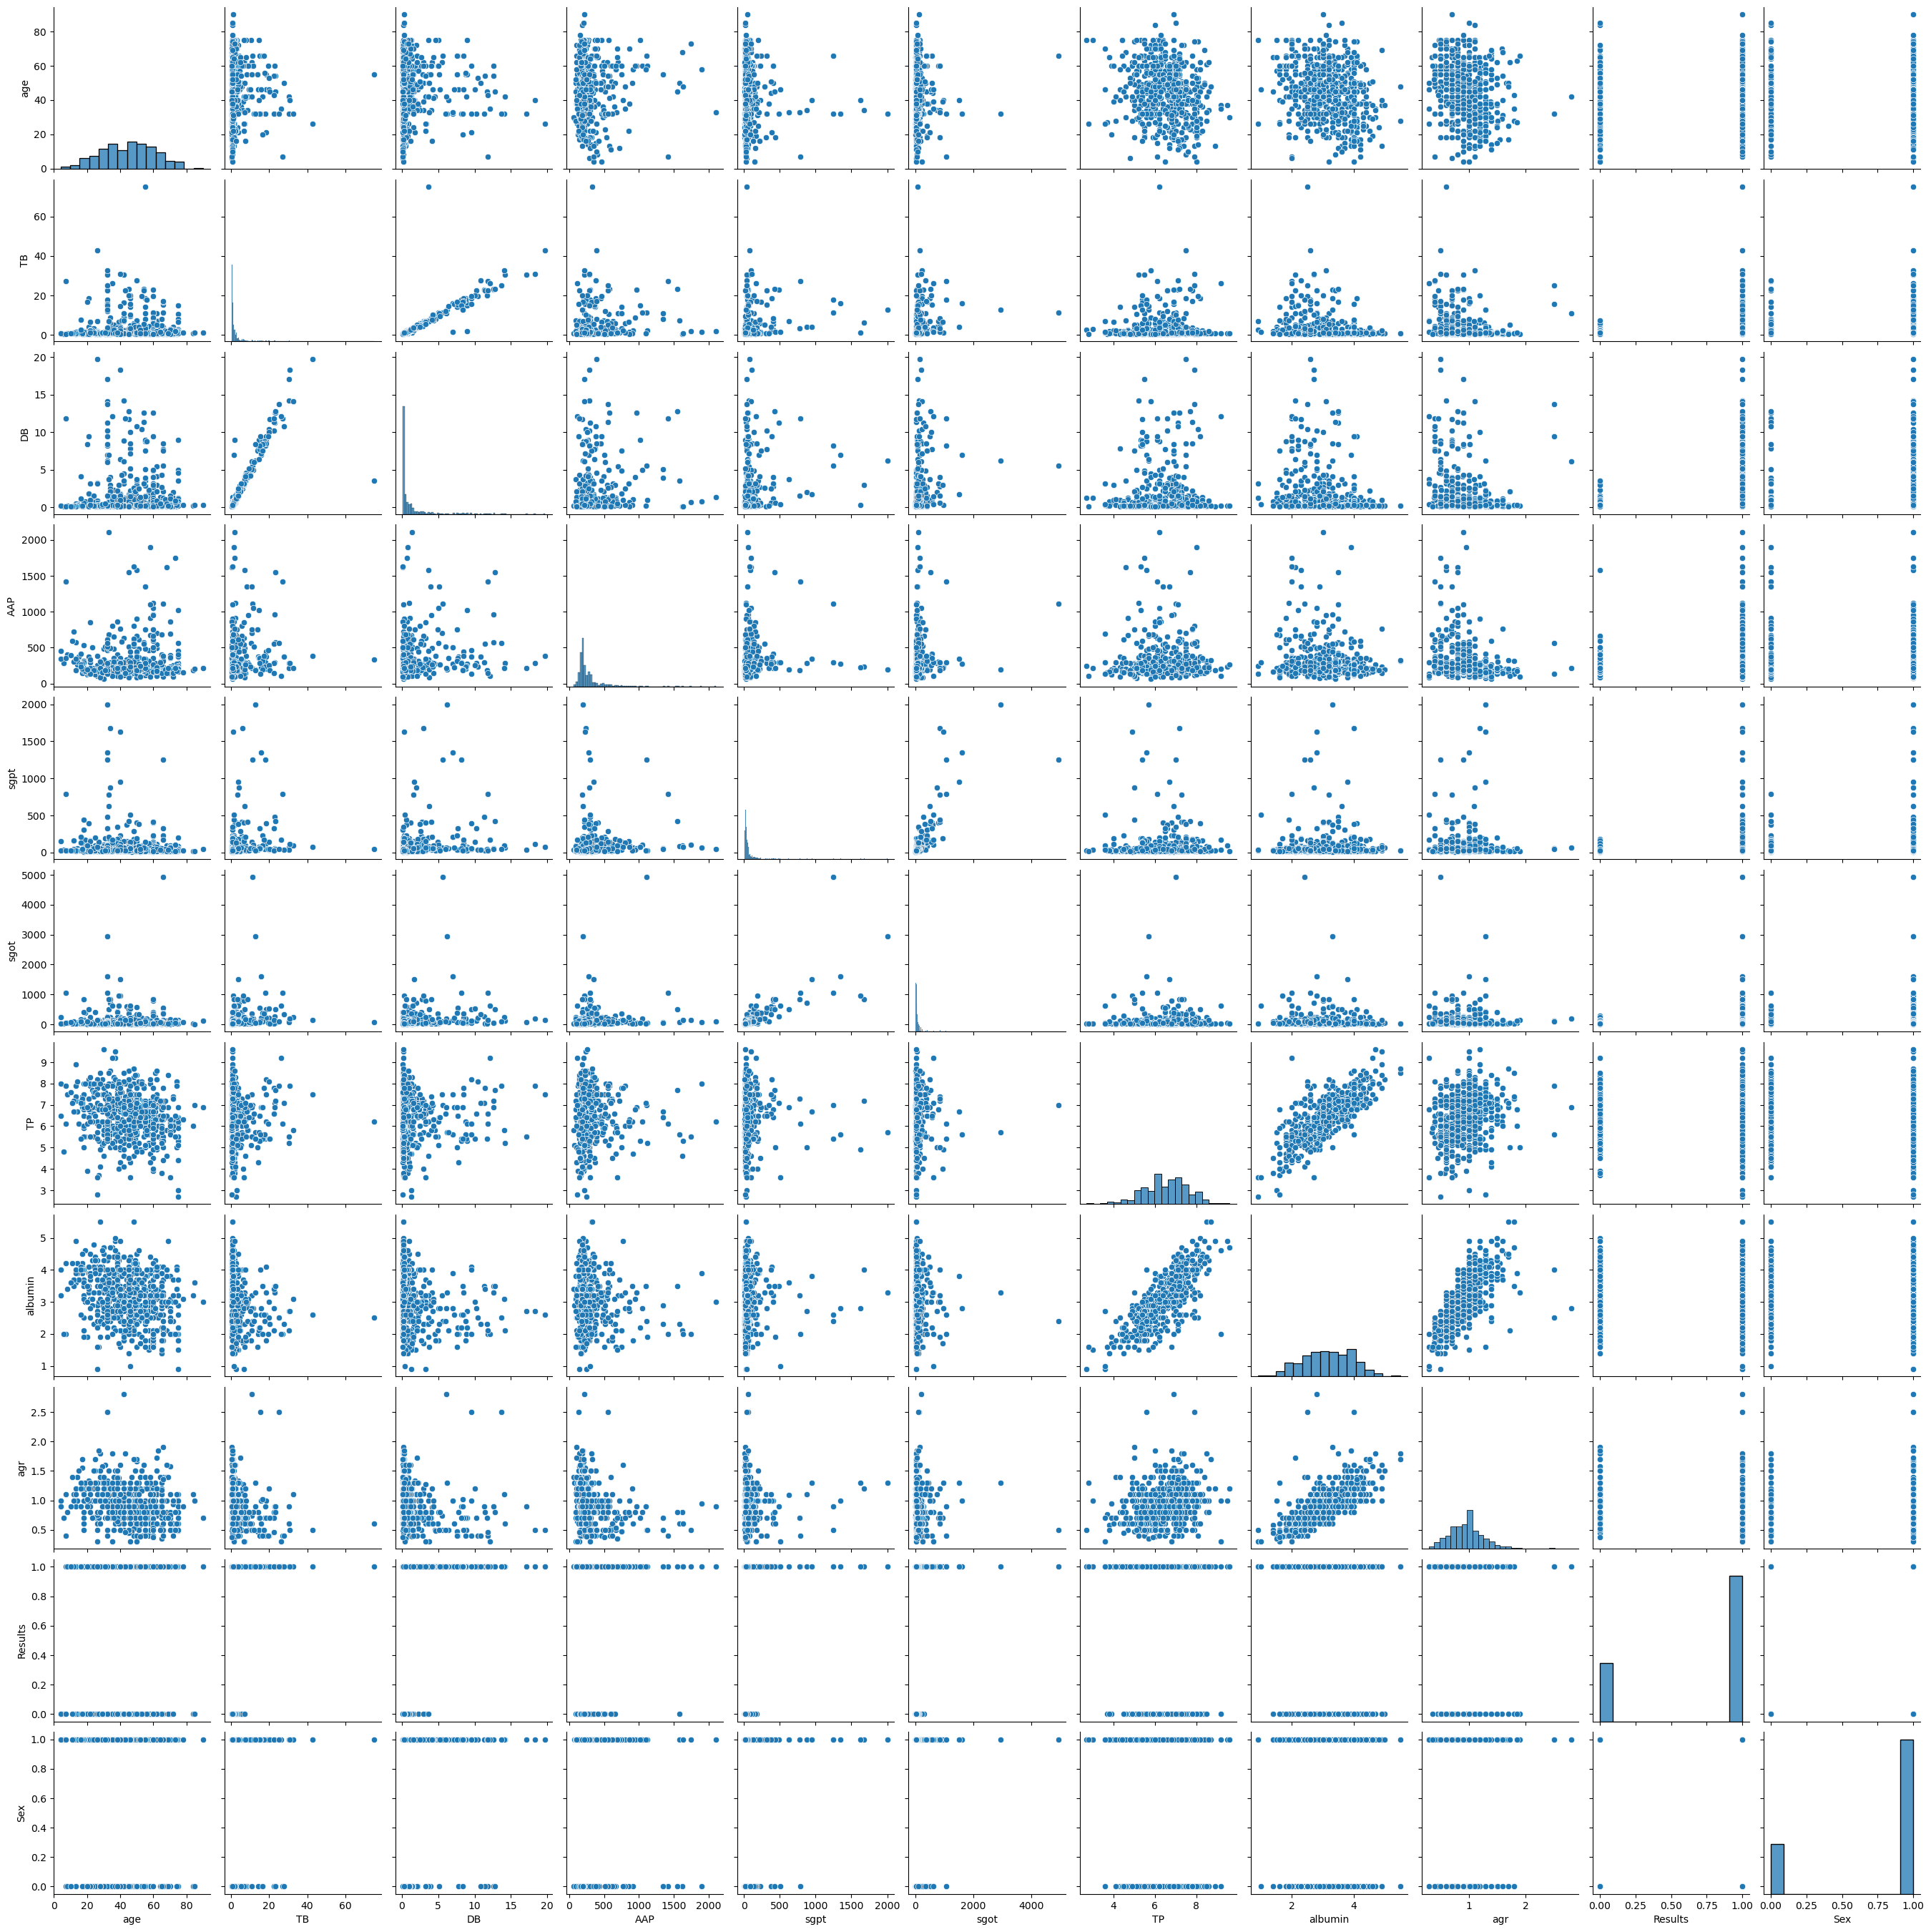

In [29]:
sns.pairplot(data)

## Checking For Outlier using Boxplot

<Axes: xlabel='variable', ylabel='value'>

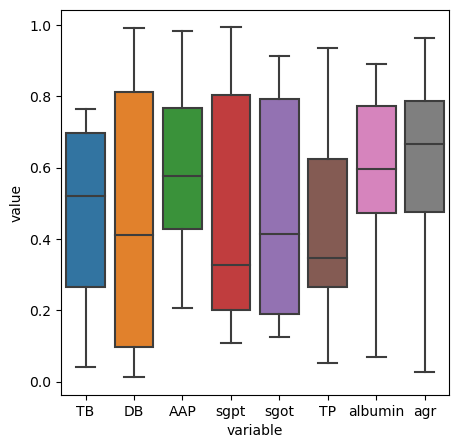

In [30]:
df = pd.DataFrame(data = np.random.random(size=(10,8)), columns =['TB', 'DB', 'AAP', 'sgpt', 'sgot', 'TP', 'albumin','agr',])
sns.boxplot(x="variable", y="value", data=pd.melt(df))

### The box plot allows us to visualize the distribution of values for each variable, including the median, quartiles, and any potential outliers. 

## Checking for Correlation

In [31]:
data.corr()

,age,TB,DB,AAP,sgpt,sgot,TP,albumin,agr,Results,Sex
age,1.000000,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,0.133821,0.057542
TB,0.010704,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,0.224467,0.089068
DB,0.006268,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,0.250926,0.100448
AAP,0.080085,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,0.186057,-0.024879
sgpt,-0.084319,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,0.161617,0.083336
sgot,-0.017352,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,0.151009,0.080593
TP,-0.195893,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,-0.036443,-0.092049
albumin,-0.269448,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,-0.165273,-0.093208
agr,-0.215967,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,-0.171402,-0.005611
Results,0.133821,0.224467,0.250926,0.186057,0.161617,0.151009,-0.036443,-0.165273,-0.171402,1.000000,0.077396


### By examining the correlation matrix, one can identify which variables are positively or negatively correlated with each other. This information is helpful in understanding the relationships between variables and can be used for feature selection, identifying multicollinearity, or gaining insights into the data.

## Heatmap ( Showing Correlation b/w each others)

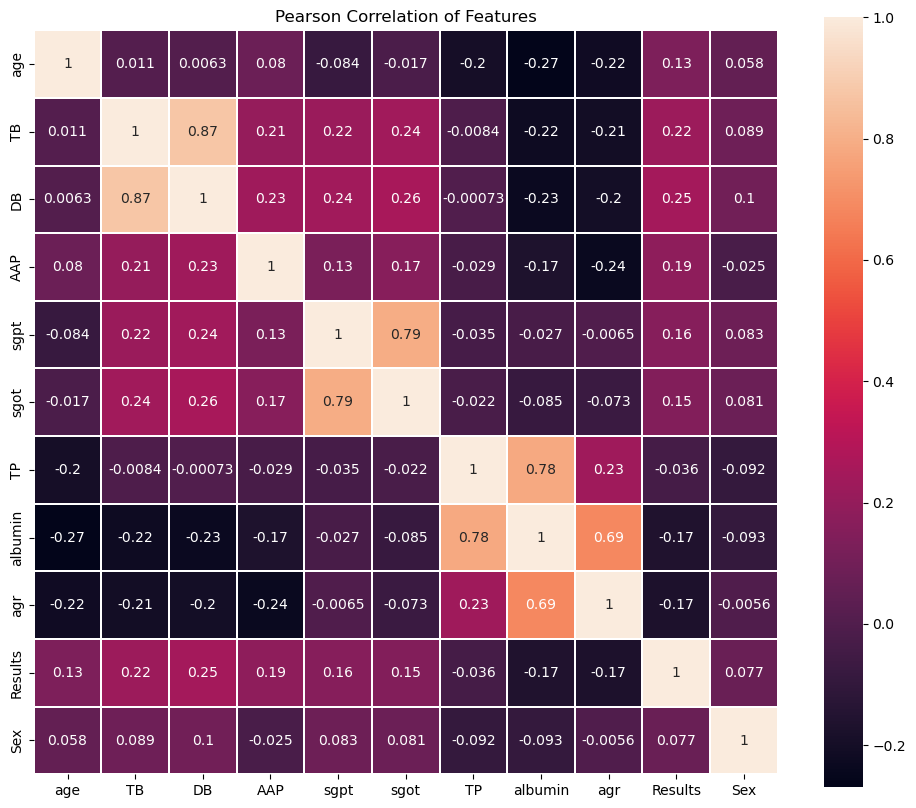

In [32]:
plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')

sns.heatmap(data.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.show()

### From the heatmap,Direct_Bilirubin(DB) & Total_Bilirubin(TB)-0.87, Alanine_Aminotransferase(sgpt) & Aspartate_Aminotransferase(sgot)-0.79, Albumin & Total_Protiens(TP)-0.78 are highly correlated features.

In [33]:
corr_matrix=data.corr().round(2)
corr_matrix['Results'].sort_values(ascending=False)

Results    1.00
DB         0.25
TB         0.22
AAP        0.19
sgpt       0.16
sgot       0.15
age        0.13
Sex        0.08
TP        -0.04
albumin   -0.17
agr       -0.17
Name: Results, dtype: float64

### Rounding the correlation coefficients to two decimal places simplifies the representation while still preserving important information.Sorting the correlation coefficients can help in understanding the strength and direction of the relationship between the 'Results' variable and other variables. It allows us to prioritize variables that have a stronger correlation with 'Results' and may be more influential in determining the outcome.

## Splitting Data Into X and Y:-

In [34]:
x=data.drop(['Results'],axis=1)
y=data['Results']

### The DataFrame 'x' contains the input features without the 'Results' column.The Series 'y' contains the target variable 'Results'.This split is typically done in machine learning tasks where you need to separate the input features from the target variable. The input features (x) are used to train the model, while the target variable (y) is used as the expected output or label for the corresponding input data points.

In [35]:
Non_Liver_patients=data[data['Results']==0]
liver_patients=data[data['Results']==1]

### The DataFrame 'Non_Liver_patients' will contain all the rows from the original DataFrame where the 'Results' column has a value of 0, representing non-liver patients.The DataFrame 'liver_patients' will contain all the rows from the original DataFrame where the 'Results' column has a value of 1, representing liver patients.
### This type of split is commonly used in binary classification tasks, where you have a target variable with two distinct classes. It allows us to analyze and work with the data for each class separately.

In [36]:
print(liver_patients.shape)

(404, 11)


In [37]:
print(Non_Liver_patients.shape)

(162, 11)


## Balancing the dataset by using SMOTE Technique:-

In [38]:
from imblearn.over_sampling import SMOTE

### We can use the imported 'SMOTE' class to apply the SMOTE oversampling technique to address class imbalance in your dataset. This technique is commonly used in machine learning tasks where the minority class is underrepresented and needs to be balanced with the majority class for better model training and performance.

In [39]:
smote=SMOTE()

### the 'smote' variable will hold the initialized SMOTE object

In [40]:
x_smote,y_smote=smote.fit_resample(x,y)

### 'x_smote' will contain the resampled input features with a balanced class distribution, and 'y_smote' will contain the resampled target variable.
### By applying SMOTE oversampling, the minority class is augmented with synthetic samples, resulting in a balanced dataset. This helps to mitigate the issues associated with class imbalance during model training and improves the performance of machine learning algorithms.

In [41]:
x_smote.shape

(808, 10)

### Printing the shape of x_smote allows us to verify the impact of the SMOTE oversampling technique on the dataset. It helps you understand the new size and structure of the input features after oversampling, which should reflect a balanced distribution of the minority and majority classes.

In [42]:
y_smote.shape

(808,)

### The shape is given in the format (num_elements,), where num_elements is the total number of elements in the y_smote variable.

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_smote,y_smote,test_size=0.30,random_state=10)

### The 'test_size' parameter is set to 0.30, which means that 30% of the data will be allocated to the testing set, while the remaining 70% will be used for training. The 'random_state' parameter is set to 10, which ensures reproducibility of the train-test split, meaning the same split will be obtained if the code is run again with the same random state value.
### After executing the code,we will have four separate variables: x_train, x_test, y_train, and y_test, representing the training and testing sets of the input features and target variable, respectively. These sets can be used for model training and evaluation purposes.

## MODEL CREATIONS:-

## Random Forest Classifer with Hyperparameter tuning

In [44]:
from sklearn.ensemble import RandomForestClassifier

### The 'RandomForestClassifier' is a popular machine learning algorithm that belongs to the ensemble learning family, specifically the random forest algorithm. This class represents the random forest classifier algorithm, which combines multiple decision tree classifiers to make predictions on unseen training data.

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':range(1,50,1),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2',None]}

### 'GridSearchCV' class from the sklearn.model_selection module allows us to perform grid search cross-validation, which involves systematically evaluating a optimal combination of hyperparameter values to find the best performing model.
### The code also defines a 'param_grid' dictionary, which specifies the hyperparameters and the corresponding values to be explored during the grid search. In this case, the hyperparameters specified are:-
### 'n_estimators': The number of trees in the random forest model, ranging from 1 to 49.
### 'criterion': The criterion used for splitting, either "gini" or "entropy".
### 'max_features': The maximum number of features to consider when splitting a node, including "auto", "sqrt", "log2", and None.
### These hyperparameter values will be explored exhaustively during the grid search to find the best combination that yields the highest model performance.

In [46]:
tuning = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5,verbose=2,n_jobs=-1,scoring='f1')
tuning.fit(x_train,y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 392 candidates, totalling 1960 fits


({'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 36},
 0.774587246077639)

### 'tuning' is the variable that represents an instance of the GridSearchCV class. It is initialized with the following parameters:
### 'estimator=RandomForestClassifier()': Specifies the machine learning model to be tuned, in this case, a RandomForestClassifier instance.
### 'param_grid=param_grid': Specifies the dictionary containing the hyperparameters and their corresponding values to be searched.
### 'cv=5': Sets the number of cross-validation folds to 5, meaning the dataset will be divided into 5 equal parts for model evaluation.
### 'verbose=2': Controls the verbosity level of the grid search process. A higher value (e.g., 2) provides more detailed output during the search.
### 'n_jobs=-1': Utilizes all available CPU cores for parallel processing during the grid search, speeding up the computation.
### 'scoring='f1': Specifies the scoring metric to evaluate the models. In this case, the F1 score is used, which balances precision and recall.
### 'tuning.fit(x_train, y_train)' performs the grid search using the training data (x_train and y_train). It explores different combinations of hyperparameters defined in 'param_grid' and evaluates the model's performance based on the specified scoring metric.
### 'tuning.best_params_' retrieves the best combination of hyperparameters found during the grid search.
### 'tuning.best_score_' returns the best score achieved by the model with the optimal hyperparameters.
### When executed, this code will run the grid search on the training data, evaluate different combinations of hyperparameters, and identify the best parameter values that result in the highest F1 score. The best parameters and corresponding best score will be printed as output.

In [47]:
classifier=RandomForestClassifier(n_estimators=85,criterion='gini',random_state=10,max_features='sqrt')

### classifier is the variable that represents an instance of the RandomForestClassifier class.
### The instance of the RandomForestClassifier class is initialized with the following hyperparameter values:-
### 'n_estimators=85': Specifies the number of trees in the random forest. In this case, the random forest will have 85 trees.
### 'criterion='gini': Sets the criterion used for splitting decision trees to the Gini impurity measure. The Gini impurity is used to evaluate the quality of a split in a decision tree.
### 'random_state=10': Sets the random state to 10, ensuring reproducibility of the model. With the same random state, running the model multiple times will produce the same results.
### 'max_features=sqrt': Specifies the maximum number of features to consider when splitting a node in each decision tree. Here, the square root of the total number of features will be considered.
### By setting these hyperparameters, the RandomForestClassifier instance is configured to use 85 trees, the Gini impurity measure for splitting, a fixed random state of 10, and the square root of the features for splitting.
### We can now proceed to train the classifier instance on the training data and use it to make predictions on unseen data.

In [48]:
model=classifier.fit(x_train,y_train)
y_pred= model.predict(x_test)

### We can use the y_pred variable to evaluate the performance of the model or compare it against the true target values (y_test) to assess the accuracy of the predictions.

In [49]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x_train,y_train,cv=10)
print(score)

[0.73684211 0.78947368 0.87719298 0.80701754 0.80701754 0.69642857
 0.80357143 0.78571429 0.82142857 0.83928571]


### The 'cross_val_score' function splits the training data into 'cv' number of folds, trains the model on 'cv-1' folds, and evaluates the performance on the remaining fold. This process is repeated 'cv' times, each time using a different fold as the validation set. The resulting scores are then stored in the 'score' variable.
### Printing the score will show the array of cross-validation scores, which provides an estimate of the model's performance on unseen data.

In [50]:
print('Max Accuracy :',round(max(score)*100,2),'%')
print('Avg Accuracy :',round(score.mean()*100,2),'%')
print('Avg Deviaton :',round(score.std()*100,2),'%')


Max Accuracy : 87.72 %
Avg Accuracy : 79.64 %
Avg Deviaton : 4.79 %


### Executing this code will print the maximum accuracy, average accuracy, and average deviation of the cross-validation scores. These metrics provide insights into the performance and consistency of the trained model.

In [52]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))
from sklearn.metrics import roc_curve
fpr,tpr,thersholds =roc_curve(y_test,model.predict_proba(x_test)[:,1])

0.7558943089430894


### It calculates the ROC AUC score by comparing the predicted target values (y_pred) with the true target values (y_test). The ROC AUC score represents the area under the Receiver Operating Characteristic (ROC) curve, which is a graphical plot showing the performance of a binary classification model across different classification thresholds.
### Printing the roc_auc_score will display the computed ROC AUC score, which ranges between 0 and 1. A higher score indicates better predictive performance of the model.

In [53]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00813008, 0.00813008, 0.00813008, 0.02439024, 0.02439024,
       0.02439024, 0.04065041, 0.04065041, 0.04878049, 0.04878049,
       0.04878049, 0.05691057, 0.05691057, 0.07317073, 0.08130081,
       0.09756098, 0.09756098, 0.10569106, 0.10569106, 0.11382114,
       0.11382114, 0.12195122, 0.13821138, 0.13821138, 0.14634146,
       0.15447154, 0.16260163, 0.17886179, 0.19512195, 0.2195122 ,
       0.23577236, 0.2601626 , 0.27642276, 0.28455285, 0.30894309,
       0.32520325, 0.34146341, 0.35772358, 0.36585366, 0.38211382,
       0.41463415, 0.45528455, 0.46341463, 0.48780488, 0.51219512,
       0.53658537, 0.56910569, 0.6097561 , 0.63414634, 0.67479675,
       0.72357724, 0.73170732, 0.77235772, 0.78861789, 0.82926829,
       0.87804878, 0.93495935, 0.95121951, 0.97560976, 0.99186992,
       1.        ])

In [54]:
tpr

array([0.        , 0.00833333, 0.06666667, 0.11666667, 0.18333333,
       0.20833333, 0.225     , 0.24166667, 0.26666667, 0.275     ,
       0.28333333, 0.3       , 0.30833333, 0.33333333, 0.34166667,
       0.375     , 0.375     , 0.38333333, 0.38333333, 0.39166667,
       0.425     , 0.43333333, 0.45      , 0.46666667, 0.5       ,
       0.5       , 0.50833333, 0.51666667, 0.55      , 0.59166667,
       0.6       , 0.61666667, 0.65      , 0.68333333, 0.70833333,
       0.70833333, 0.74166667, 0.75833333, 0.76666667, 0.775     ,
       0.78333333, 0.8       , 0.825     , 0.83333333, 0.84166667,
       0.85833333, 0.86666667, 0.86666667, 0.88333333, 0.88333333,
       0.89166667, 0.9       , 0.91666667, 0.925     , 0.94166667,
       0.95      , 0.96666667, 0.96666667, 0.975     , 0.98333333,
       0.99166667, 0.99166667, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [56]:
thersholds

array([2.        , 1.        , 0.98823529, 0.97647059, 0.95294118,
       0.94117647, 0.92941176, 0.89411765, 0.88235294, 0.87058824,
       0.84705882, 0.83529412, 0.82352941, 0.81176471, 0.8       ,
       0.78823529, 0.77647059, 0.76470588, 0.74117647, 0.72941176,
       0.70588235, 0.69411765, 0.65882353, 0.63529412, 0.62352941,
       0.6       , 0.58823529, 0.57647059, 0.55294118, 0.54117647,
       0.52941176, 0.51764706, 0.50588235, 0.49411765, 0.48235294,
       0.47058824, 0.45882353, 0.43529412, 0.42352941, 0.41176471,
       0.38823529, 0.37647059, 0.36470588, 0.35294118, 0.34117647,
       0.32941176, 0.31764706, 0.30588235, 0.29411765, 0.28235294,
       0.27058824, 0.25882353, 0.24705882, 0.23529412, 0.22352941,
       0.21176471, 0.2       , 0.18823529, 0.17647059, 0.15294118,
       0.14117647, 0.12941176, 0.11764706, 0.10588235, 0.09411765,
       0.08235294, 0.07058824, 0.05882353, 0.04705882, 0.02352941,
       0.01176471])

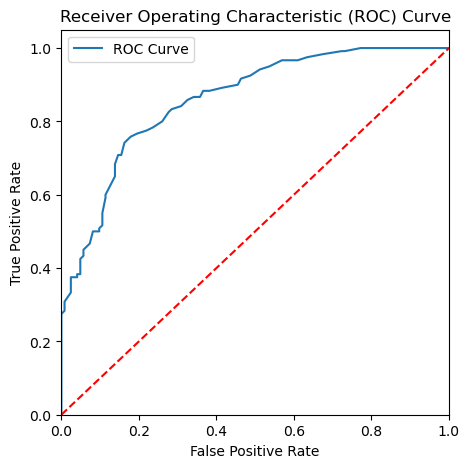

In [57]:
from sklearn.metrics import roc_curve
#import matplotlib.pyplot as plt

# Assuming we have already trained your model and obtained the predicted probabilities
plt.figure()
#Plotting the ROC curve
plt.plot(fpr,tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### It plots the ROC curve for the trained model (model) using the test data (x_test and y_test). The ROC curve visually displays the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for different classification thresholds.
### Executing this code will generate a plot showing the ROC curve for the model. The plot will include the ROC curve itself, along with the diagonal line representing a random classifier. The closer the ROC curve is to the top-left corner, the better the model's performance.

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix (y_test,y_pred))
print(classification_report(y_test,y_pred))

[[111  12]
 [ 39  81]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       123
           1       0.87      0.68      0.76       120

    accuracy                           0.79       243
   macro avg       0.81      0.79      0.79       243
weighted avg       0.80      0.79      0.79       243



### Executing this code will display the confusion matrix and classification report, which provide insights into the performance of the trained model, including accuracy and other evaluation metrics such as precision, recall, and F1-score.

In [53]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('MSE = ',mse)
print('RMSE = ',rmse)

MSE =  0.20987654320987653
RMSE =  0.4581228472908512


### Executing this code will display the calculated MSE and RMSE, which are common metrics used to evaluate the performance of regression models. Lower values of MSE and RMSE indicate better model performance, with RMSE providing a more interpretable metric as it is in the same units as the target variable.

## Logistic Regression with Hyperparameter tuning

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=10)

In [59]:
x_tra=x_train
x_tes=x_test

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_tra=sc.fit_transform(x_tra)
x_tes=sc.transform(x_tes)

### 'x_tra = sc.fit_transform(x_tra)' standardizes the training data x_tra by fitting the scaler (sc) to the training data and then transforming it. The fit_transform method computes the mean and standard deviation of the training data and applies the transformation to make the data have zero mean and unit variance.
### 'x_tes = sc.transform(x_tes)' applies the same standardization transformation to the testing data x_tes. Here, the transform method uses the mean and standard deviation computed from the training data to perform the transformation on the testing data. It ensures that the testing data is scaled using the same parameters as the training data.
### Executing this code will standardize the feature data using the StandardScaler. This process is commonly used in machine learning workflows to ensure that features are on a similar scale, which can help improve the performance of certain algorithms that are sensitive to the scale of the input data.

In [61]:
from sklearn.linear_model import LogisticRegression

### The logistic regression algorithm is a popular supervised learning algorithm used for binary classification problems. It models the relationship between the input features and the probability of the target variable belonging to a specific class

In [62]:
param_grid=[{'max_iter': range(1,50,5),'solver': ['liblinear','sage','newton-cg','sag','lbfgs']}]

### 'param_grid' is a list containing a dictionary. The dictionary specifies the hyperparameters to be tuned and their respective values.
### 'max_iter': range(1, 50, 5) specifies a range of values for the max_iter hyperparameter. The range starts from 1, increments by 5, and stops at 50. This will be used to explore different values for the maximum number of iterations during model training.
### 'solver': ['liblinear','sage','newton-cg','sag','lbfgs'] specifies a list of solvers to be used for the logistic regression model. The solvers are algorithms used to optimize the model's objective function. The listed solvers are 'liblinear', 'sag', 'newton-cg', 'sag', and 'lbfgs'.
### The parameter grid is typically used in combination with techniques like grid search or random search to systematically explore different combinations of hyperparameter values and find the optimal set of hyperparameters for the logistic regression model.

In [63]:
from sklearn.model_selection import GridSearchCV
tuning= GridSearchCV(estimator =LogisticRegression(),param_grid=param_grid,cv=5,verbose=True,n_jobs=-1,scoring='f1')
tuning.fit(x_tra,y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


({'max_iter': 1, 'solver': 'liblinear'}, 0.8221693095557082)

### Executing this code will perform the grid search with cross-validation and provide the best hyperparameters and the corresponding best score achieved during the search.

In [64]:
model=LogisticRegression(max_iter=12,solver='newton-cg',random_state=10)
model.fit(x_tra,y_train)
y_pred = model.predict(x_tes)

### Executing this code will train the logistic regression model, make predictions on the test data, and store the predicted labels in the y_pred variable.

In [65]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x_tra,y_train,cv=10)
print(score)

[0.73913043 0.65217391 0.66666667 0.66666667 0.75555556 0.71111111
 0.66666667 0.77777778 0.68888889 0.8       ]


In [66]:
print('Max Accuracy :',round(max(score)*100,2),'%')
print('Avg Accuracy :',round(score.mean()*100,2),'%')
print('Avg Deviaton :',round(score.std()*100,2),'%')

Max Accuracy : 80.0 %
Avg Accuracy : 71.25 %
Avg Deviaton : 5.0 %


In [68]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))
from sklearn.metrics import roc_curve
fpr,tpr,thersholds =roc_curve(y_test,model.predict_proba(x_test)[:,1])

0.5423018292682926


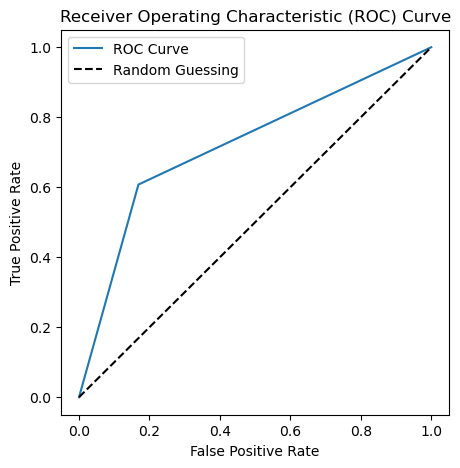

In [86]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Assuming you have already trained your model and obtained the predicted probabilities
y_pred_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix (y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 7 25]
 [11 71]]
              precision    recall  f1-score   support

           0       0.39      0.22      0.28        32
           1       0.74      0.87      0.80        82

    accuracy                           0.68       114
   macro avg       0.56      0.54      0.54       114
weighted avg       0.64      0.68      0.65       114



In [72]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('MSE = ',mse)
print('RMSE = ',rmse)

MSE =  0.3157894736842105
RMSE =  0.5619514869490163


## KNN with Hyperparameter tuning

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_smote,y_smote,test_size=0.20,random_state=10)

### Executing this code will split the data into training and test sets, and store the results in the variables x_train, x_test, y_train, and y_test.

In [74]:
from sklearn.preprocessing import StandardScaler
x_tr=x_train
x_te=x_test
sc=StandardScaler()
x_tra=sc.fit_transform(x_tr)
x_tes=sc.transform(x_te)

In [75]:
param_grid=[{'n_neighbors': range(1,50,1),'algorithm':['auto','ball_tree','kd_tree','brute'],'weights':['uniform','distance'],'p': [0,1,2,3]}]

### param_grid is a list containing a dictionary of hyperparameters and their possible values for the KNN classifier.
### 'n_neighbors': range(1, 50, 1) specifies the number of neighbors to consider for classification. The values range from 1 to 50, incrementing by 1.
### 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] specifies the algorithm used to compute the nearest neighbors. The available options are 'auto', 'ball_tree', 'kd_tree', and 'brute'.
### 'weights': ['uniform', 'distance'] specifies the weight function used in prediction. 'uniform' assigns equal weights to all neighbors, while 'distance' assigns weights proportional to the inverse of the distance.
### 'p': [0, 1, 2, 3] specifies the power parameter for the Minkowski distance metric. Different values of 'p' correspond to different distance metrics, such as Euclidean distance ('p=2') and Manhattan distance ('p=1').
### The parameter grid defines a combination of hyperparameters to be tested during hyperparameter tuning using techniques like grid search or randomized search.

In [76]:
from sklearn.neighbors import KNeighborsClassifier

### By importing this class, we can create an instance of the KNeighborsClassifier and use it to train and predict with the K-nearest neighbors algorithm.

In [77]:
from sklearn.model_selection import GridSearchCV
tuning = GridSearchCV(estimator= KNeighborsClassifier(),param_grid=param_grid,cv=5,verbose=True,n_jobs=-1,scoring='f1')
tuning.fit(x_tr,y_train)
tuning.best_params_,tuning.best_score_

Fitting 5 folds for each of 1568 candidates, totalling 7840 fits


({'algorithm': 'auto', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'},
 0.7210503834515201)

In [78]:
model=KNeighborsClassifier(n_neighbors=1,p=2,algorithm='auto',weights='uniform')
model.fit(x_tr,y_train)
y_pred= model.predict(x_te)

In [79]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x_tr,y_train,cv=10)
print(score)

[0.76923077 0.72307692 0.76923077 0.8        0.75384615 0.72307692
 0.703125   0.75       0.75       0.890625  ]


In [80]:
print('Max Accuracy :',round(max(score)*100,2),'%')
print('Avg Accuracy :',round(score.mean()*100,2),'%')
print('Avg Deviaton :',round(score.std()*100,2),'%')

Max Accuracy : 89.06 %
Avg Accuracy : 76.32 %
Avg Deviaton : 4.99 %


In [81]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))


0.71946011895684


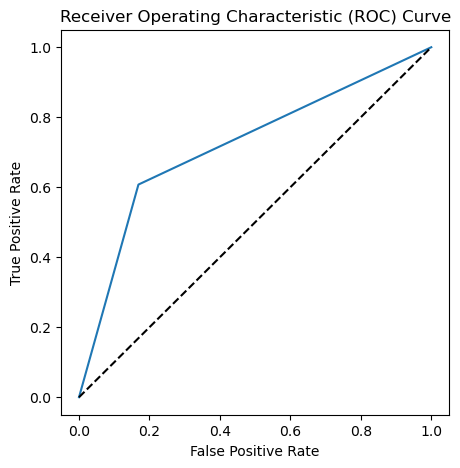

In [82]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Assuming you have already trained your model and obtained the predicted probabilities
y_pred_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix (y_test,y_pred))
print(classification_report(y_test,y_pred))

[[69 14]
 [31 48]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        83
           1       0.77      0.61      0.68        79

    accuracy                           0.72       162
   macro avg       0.73      0.72      0.72       162
weighted avg       0.73      0.72      0.72       162



In [84]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('MSE = ',mse)
print('RMSE = ',rmse)

MSE =  0.2777777777777778
RMSE =  0.5270462766947299


## Support Vector Classifier with Hyperparameter tuning

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test= train_test_split(x_smote,y_smote,test_size=0.20,random_state=10)

In [ ]:
#from sklearn import svm

In [ ]:
#from sklearn.model_selection import GridSearchCV
#param_grid={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['auto','auto_deprecated'],'decision_function_shape':['ovo','ovr']}

In [ ]:
#tuning =GridSearchCV(estimator=svm.SVC(),param_grid=param_grid,cv=5,verbose=2,scoring='f1',n_jobs=-1)
#tuning.fit(x_train,y_train)
#tuning.best_params_,tuning.best_score_,tuning.best_index_

In [ ]:
#model=svm.SVC(decision_function_shape='ovo',gamma='auto',kernel='sigmoid',probability=True,shrinking=True,random_state=10)

In [ ]:
#model.fit(x_tr,y_train)
#y_pred=model.predict(x_te)

In [ ]:
#from sklearn.model_selection import cross_val_score
#score=cross_val_score(model,x_tr,y_train,cv=10)
#print(score)

In [ ]:
#print('Max Accuracy :',round(max(score)*100,2),'%')
#print('Avg Accuracy :',round(score.mean()*100,2),'%')
#print('Avg Deviaton :',round(score.std()*100,2),'%')

In [ ]:
#from sklearn.metrics import roc_auc_score
#print(roc_auc_score(y_test,y_pred))

In [ ]:
#from sklearn.metrics import roc_curve
#import matplotlib.pyplot as plt

# Assuming you have already trained your model and obtained the predicted probabilities
#y_pred_proba = model.predict_proba(x_test)[:, 1]
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plotting the ROC curve
#plt.plot(fpr, tpr, label='ROC Curve')
#plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
#plt.legend()
#plt.show()


In [ ]:
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report,confusion_matrix

#print(confusion_matrix (y_test,y_pred))
#print(classification_report(y_test,y_pred))

In [ ]:
#from sklearn.metrics import mean_squared_error
#mse=mean_squared_error(y_test,y_pred)
#rmse=np.sqrt(mse)
#print('MSE = ',mse)
#print('RMSE = ',rmse)

## Conclusion

### From the above classifier models,hyperparameter tuning helped in increasing the accuracy scores.We have finalized the Random Forest Classifier as the best fit model for our Project as it is having a max accuracy of 87.72 % , the best average accuracy of 79.64 % and the best ROC Score of 0.75

## Challenges Faced

### Hyperparameter Tuning in SVM Classifier,even after 10 hours of loading did not provide any output which was not suitable for us to continue further .So,we have made the SVM code block as comments.
